In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

In [2]:
df = pd.read_csv('Road.csv')

In [3]:
print("Data shape", df.shape)
df.head()

Data shape (12316, 32)


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

Data cleaning

In [5]:
# for all columns with numeric values
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# for all columns with object values
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [6]:
df.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [7]:
print(df['Weather_conditions'].value_counts())

Weather_conditions
Normal               10063
Raining               1331
Other                  296
Unknown                292
Cloudy                 125
Windy                   98
Snow                    61
Raining and Windy       40
Fog or mist             10
Name: count, dtype: int64


No. of accidents per weather conditions

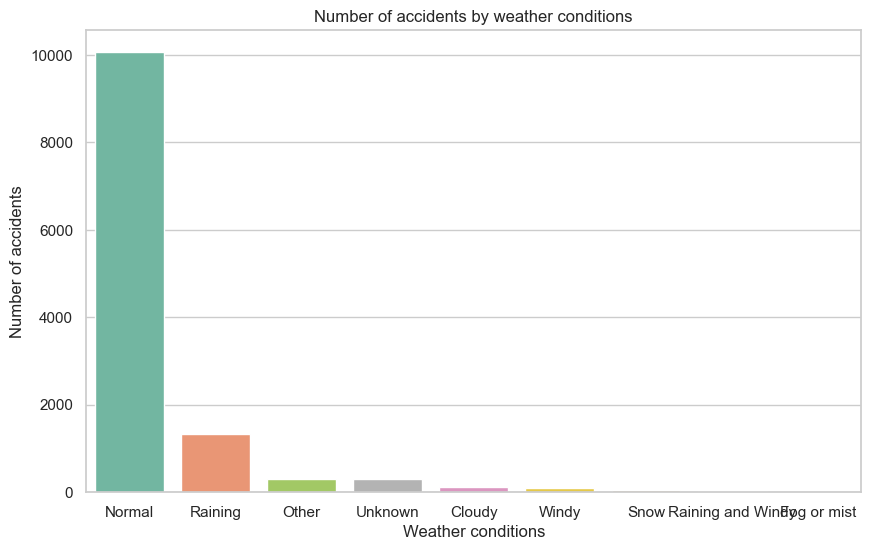

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='Weather_conditions', data=df, order=df['Weather_conditions'].value_counts().index,hue='Weather_conditions', palette='Set2', legend=False)
plt.title("Number of accidents by weather conditions")
plt.xlabel("Weather conditions")
plt.ylabel("Number of accidents")
plt.show()

Severity Distribution

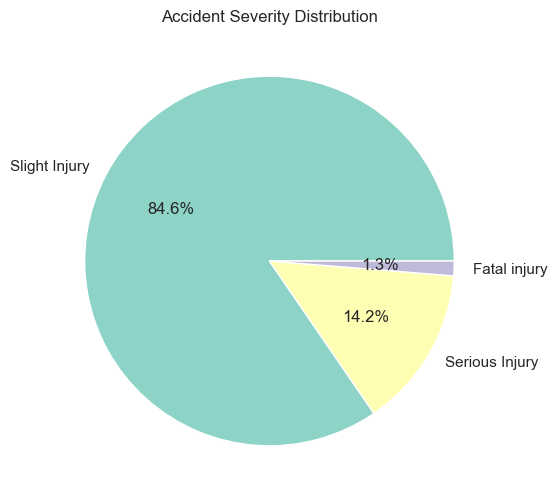

In [9]:
if 'Accident_severity' in df.columns:
    plt.figure(figsize=(6,6))
    df['Accident_severity'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'))
    plt.title("Accident Severity Distribution")
    plt.ylabel("")
    plt.show()

Accidents by day of week

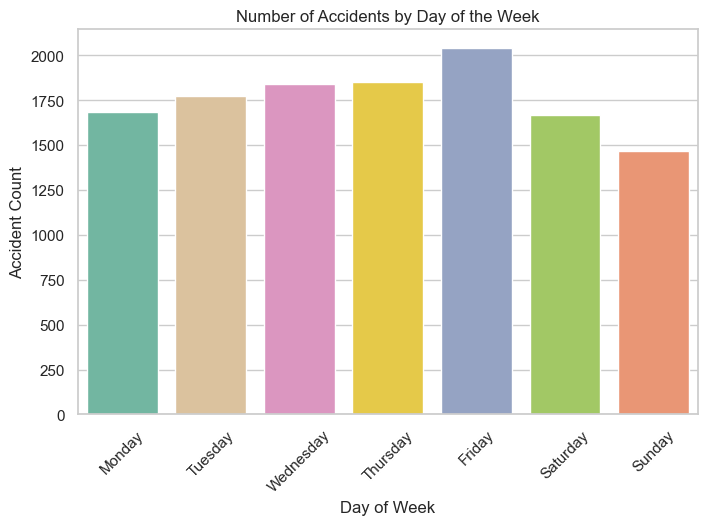

In [18]:
plt.figure(figsize=(8,5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='Day_of_week', data=df, order=order, hue='Day_of_week', palette='Set2', legend=False)
plt.title("Number of Accidents by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Accident Count")
plt.xticks(rotation=45)
plt.show()


Weather VS Severity

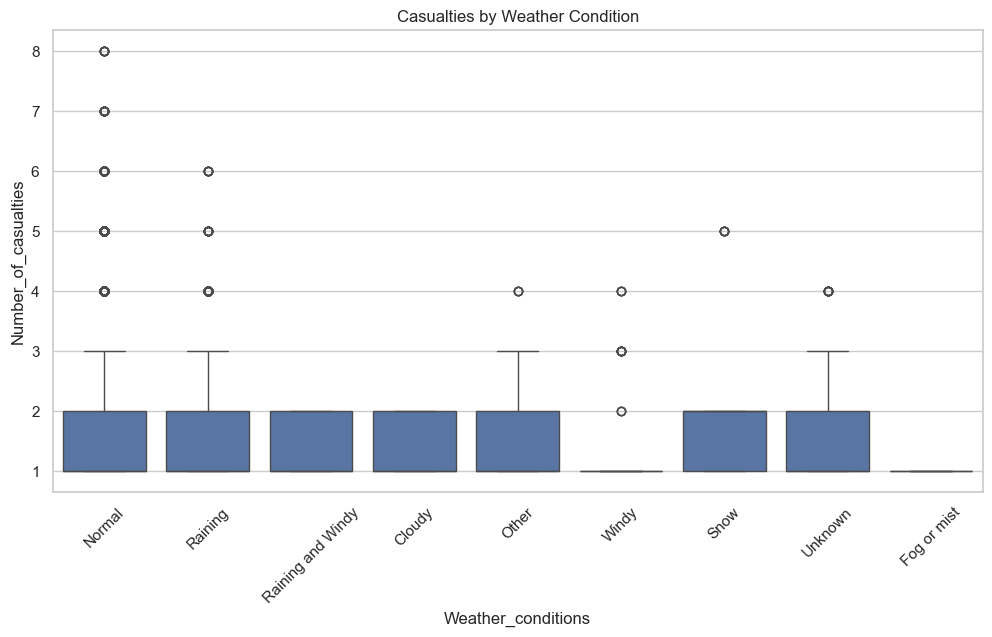

In [12]:
if 'Number_of_casualties' in df.columns:
    plt.figure(figsize=(12,6))
    sns.boxplot(x='Weather_conditions', y='Number_of_casualties', data=df)
    plt.xticks(rotation=45)
    plt.title("Casualties by Weather Condition")
    plt.show()

Driver gender

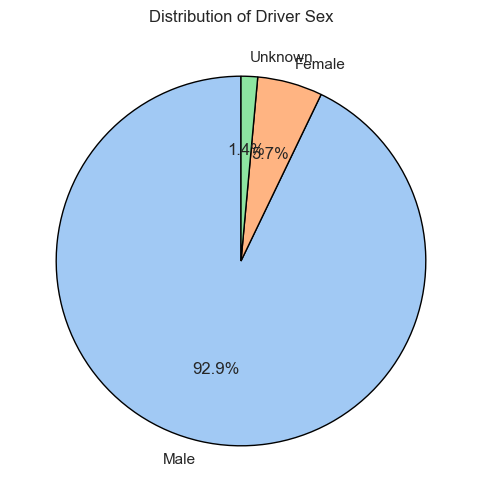

In [20]:
plt.figure(figsize=(6,6))
sex_counts = df['Sex_of_driver'].value_counts()
sex_counts.plot.pie(autopct='%1.1f%%', startangle=90, 
                    colors=sns.color_palette('pastel'), 
                    wedgeprops={'edgecolor': 'black'})

plt.title("Distribution of Driver Sex")
plt.ylabel("") 
plt.show()


How weather affects severity

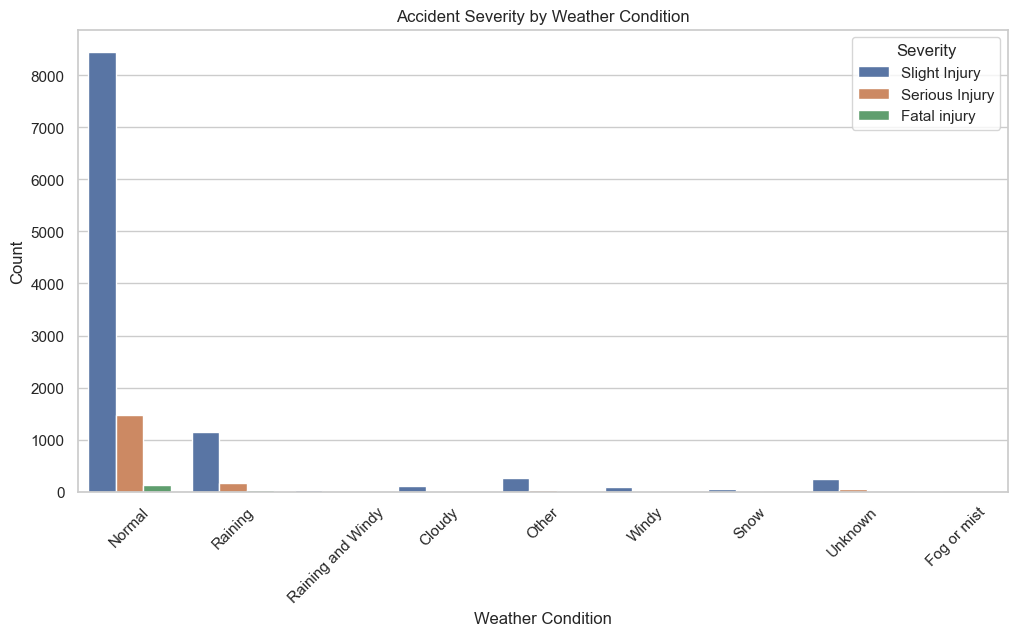

In [15]:
if 'Accident_severity' in df.columns:
    plt.figure(figsize=(12,6))
    sns.countplot(x='Weather_conditions', hue='Accident_severity', data=df)
    plt.xticks(rotation=45)
    plt.title("Accident Severity by Weather Condition")
    plt.xlabel("Weather Condition")
    plt.ylabel("Count")
    plt.legend(title='Severity')
    plt.show()

In [21]:
print(df['Light_conditions'].value_counts())

Light_conditions
Daylight                   8798
Darkness - lights lit      3286
Darkness - no lighting      192
Darkness - lights unlit      40
Name: count, dtype: int64


In [24]:
df['Light_conditions'] = df['Light_conditions'].replace({
    'Darkness - lights lit': 'Darkness',
    'Darkness - lights unlit': 'Darkness',
    'Darkness - no lighting': 'Darkness',
})


Light conditions VS accidents

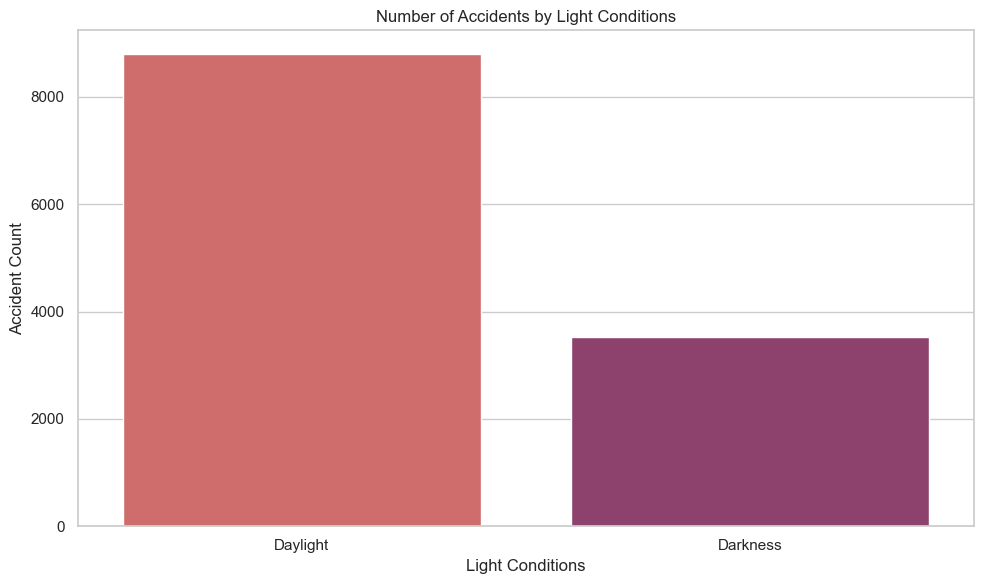

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Light_conditions', order=df['Light_conditions'].value_counts().index, hue='Light_conditions', palette='flare', legend=False)
plt.title("Number of Accidents by Light Conditions")
plt.xlabel("Light Conditions")
plt.ylabel("Accident Count")
plt.tight_layout()
plt.show()
